In [1]:
'''import pandas as pd
import sqlite3

# Read sqlite query results into a pandas DataFrame
con = sqlite3.connect('information.db')
df = pd.read_sql_query("SELECT * from Comp", con)

# Verify that result of SQL query is stored in the dataframe
print(df.head())

con.close()'''

'import pandas as pd\nimport sqlite3\n\n# Read sqlite query results into a pandas DataFrame\ncon = sqlite3.connect(\'information.db\')\ndf = pd.read_sql_query("SELECT * from Comp", con)\n\n# Verify that result of SQL query is stored in the dataframe\nprint(df.head())\n\ncon.close()'

In [2]:
#df.columns

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("Consumer_Complaints.csv")
original_db=df[pd.notnull(df['Consumer Complaint'])]
df.shape

(9999, 18)

In [5]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer Complaint,Company Public Response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date Sent to Company,Company Response to Consumer,Timely response?,Consumer disputed?,Complaint ID
0,3/12/14,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,M&T BANK CORPORATION,MI,48382,NaN,NaN,Referral,3/17/14,Closed with explanation,Yes,No,759217
1,10/1/16,Credit reporting,NaN,Incorrect information on credit report,Account status,I have outdated information on my credit repor...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AL,352XX,NaN,Consent provided,Web,10/5/16,Closed with explanation,Yes,No,2141773
2,10/17/16,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,I purchased a new car on XXXX XXXX. The car de...,NaN,"CITIZENS FINANCIAL GROUP, INC.",PA,177XX,Older American,Consent provided,Web,10/20/16,Closed with explanation,Yes,No,2163100
3,6/8/14,Credit card,NaN,Bankruptcy,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Older American,NaN,Web,6/10/14,Closed with explanation,Yes,Yes,885638
4,9/13/14,Debt collection,Credit card,Communication tactics,Frequent or repeated calls,NaN,NaN,"CITIBANK, N.A.",VA,23233,NaN,NaN,Web,9/13/14,Closed with explanation,Yes,Yes,1027760


In [6]:
df.shape

(9999, 18)

In [7]:
col = ['Product', 'Consumer Complaint']
df= df[col]
df= df[pd.notnull(df['Consumer Complaint'])]
#df.head()

In [8]:
df.columns=['Product', 'Consumer_complaint']

In [9]:
df['category_id'] = df['Product'].factorize()[0]

In [10]:

cat_id_df = df[["Product", "category_id"]].drop_duplicates().sort_values('category_id')


In [11]:
cat_to_id = dict(cat_id_df.values)
cat_to_id

{'Credit reporting': 0,
 'Consumer Loan': 1,
 'Debt collection': 2,
 'Mortgage': 3,
 'Credit card': 4,
 'Other financial service': 5,
 'Bank account or service': 6,
 'Student loan': 7,
 'Money transfers': 8,
 'Payday loan': 9,
 'Prepaid card': 10,
 'Money transfer, virtual currency, or money service': 11,
 'Credit reporting, credit repair services, or other personal consumer reports': 12,
 'Checking or savings account': 13,
 'Vehicle loan or lease': 14,
 'Credit card or prepaid card': 15}

In [12]:
id_to_cat = dict(cat_id_df[['category_id','Product']].values)
id_to_cat

{0: 'Credit reporting',
 1: 'Consumer Loan',
 2: 'Debt collection',
 3: 'Mortgage',
 4: 'Credit card',
 5: 'Other financial service',
 6: 'Bank account or service',
 7: 'Student loan',
 8: 'Money transfers',
 9: 'Payday loan',
 10: 'Prepaid card',
 11: 'Money transfer, virtual currency, or money service',
 12: 'Credit reporting, credit repair services, or other personal consumer reports',
 13: 'Checking or savings account',
 14: 'Vehicle loan or lease',
 15: 'Credit card or prepaid card'}

In [13]:
df.head()

,Product,Consumer_complaint,category_id
1,Credit reporting,I have outdated information on my credit repor...,0
2,Consumer Loan,I purchased a new car on XXXX XXXX. The car de...,1
7,Credit reporting,An account on my credit report has a mistaken ...,0
12,Debt collection,This company refuses to provide me verificatio...,2
16,Debt collection,This complaint is in regards to Square Two Fin...,2


In [14]:
import matplotlib.pyplot as plt

In [15]:
fig = plt.figure(figsize= (8,6))

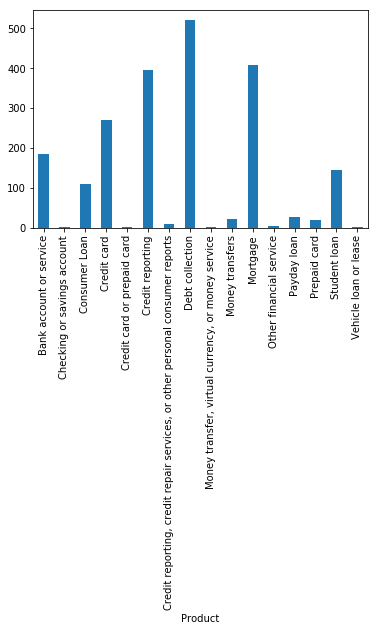

In [16]:
df.groupby('Product').Consumer_complaint.count().plot.bar(ylim=0)

In [17]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(df['Consumer_complaint'], df['Product'], random_state= 0)
X_train, X_test, y_train, y_test = train_test_split(df['Consumer_complaint'], df['category_id'], random_state= 0)

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [19]:
tfidf = TfidfVectorizer(sublinear_tf= True, #use a logarithmic form for frequency
                       min_df = 5, #minimum numbers of documents a word must be present in to be kept
                       norm= 'l2', #ensure all our feature vectors have a euclidian norm of 1
                       ngram_range= (1,2), #to indicate that we want to consider both unigrams and bigrams.
                       stop_words ='english') #to remove all common pronouns to reduce the number of noisy features

In [20]:
features = tfidf.fit_transform(X_train).toarray()
tfidf.vocabulary_ #word count(vocabulary of our model)

{'duplicate': 1492,
 'payment': 2868,
 'auto': 593,
 'loan': 2340,
 'local': 2372,
 'branch': 710,
 'days': 1240,
 'later': 2226,
 'using': 4108,
 'debit': 1259,
 'card': 789,
 'declined': 1293,
 'twice': 4043,
 'learned': 2243,
 'account': 270,
 'did': 1361,
 'request': 3404,
 'informed': 2095,
 'resulted': 3460,
 'late': 2216,
 'fees': 1685,
 'associated': 552,
 'pending': 2925,
 'eviction': 1578,
 'debits': 1263,
 'posting': 3013,
 'time': 3923,
 'period': 2933,
 'referred': 3248,
 'corporate': 1117,
 'number': 2673,
 'manager': 2455,
 'acknowledged': 342,
 'fault': 1661,
 'agreed': 430,
 'reimburse': 3287,
 'losses': 2399,
 'decided': 1290,
 'act': 349,
 'fraud': 1787,
 'unit': 4068,
 'bank': 623,
 'auto loan': 594,
 'local branch': 2374,
 'days later': 1244,
 'debit card': 1260,
 'informed account': 2096,
 'late fees': 2221,
 'time period': 3932,
 'branch manager': 711,
 'bought': 707,
 'money': 2539,
 'order': 2753,
 'xxxx': 4276,
 'pay': 2840,
 'credited': 1194,
 'stolen': 3787,

In [21]:
print("idfs : ",tfidf.idf_)

idfs :  [ 2.15636431  5.53575706  6.57721093 ...,  5.80402104  6.17174582
  6.57721093]


In [22]:
print(features)

[[ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 ..., 
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.04941928  0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.16554878  0.          0.        ]]


In [23]:
#Checking normalization
import numpy as np
np.set_printoptions(threshold=np.inf)
features[0]
k=0
for i in features[0]:
    #print(i)
    k+=i**2
print(k**0.5)
print(features[0])


1.0
[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.        

In [24]:
from sklearn.svm import LinearSVC

clf = LinearSVC().fit(features, y_train)



In [25]:
print(id_to_cat[int(clf.predict(tfidf.transform(['I have outdated information on car loan'])))])
#print(clf.predict(tfidf.transform(['I have purchased car on home'])))
clf.score(tfidf.transform(X_train),y_train)

Consumer Loan


0.99936908517350154

In [26]:
clf.score(tfidf.transform(X_test),y_test)

0.80718336483931952

In [27]:
y_pred = clf.predict(tfidf.transform(X_test))


In [28]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred, labels= df.category_id, target_names=df['Product'].unique()))

                                                                              precision    recall  f1-score   support

                                                            Credit reporting       0.79      0.90      0.84        91
                                                               Consumer Loan       0.67      0.38      0.48        21
                                                             Debt collection       0.79      0.90      0.84        91
                                                                    Mortgage       0.82      0.90      0.86       124
                                                                 Credit card       0.82      0.90      0.86       124
                                                     Other financial service       0.90      0.93      0.91       113
                                                     Bank account or service       0.90      0.93      0.91       113
                                                       

F:\ANACONDA\envs\ct\lib\site-packages\sklearn\metrics\_classification.py:1989: UserWarning: labels size, 2114, does not match size of target_names, 16
  .format(len(labels), len(target_names))
F:\ANACONDA\envs\ct\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\ANACONDA\envs\ct\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


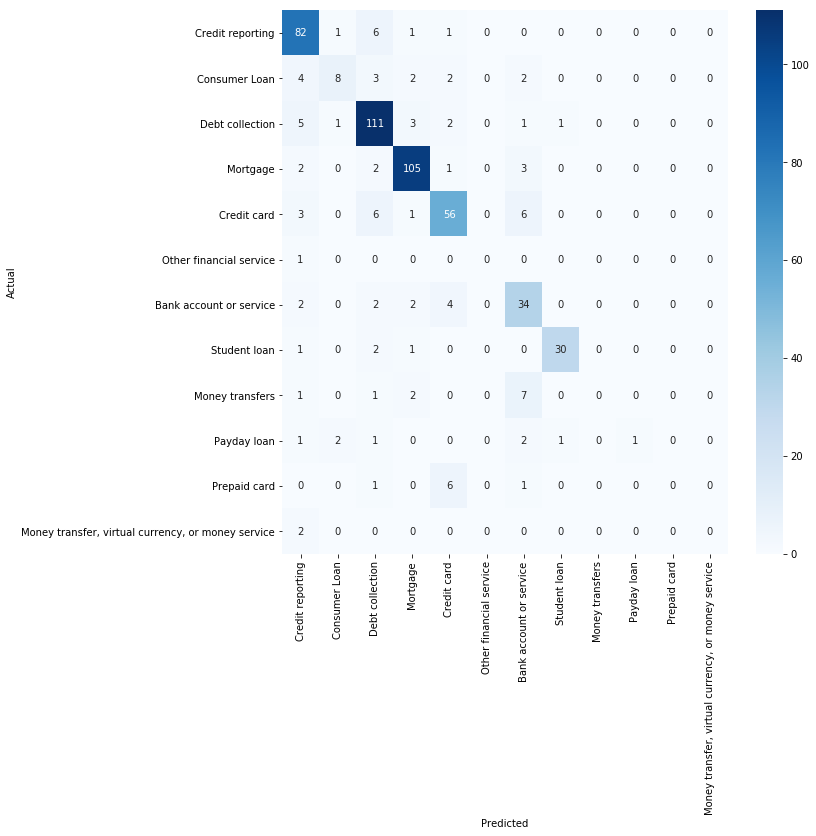

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',cmap="Blues",
            xticklabels=df['Product'].unique()[0:-4], yticklabels=df['Product'].unique()[0:-4])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [30]:
'''from sklearn.svm import SVC #uses one vs one classification
clf_2 = SVC().fit(features, y_train)'''

'from sklearn.svm import SVC #uses one vs one classification\nclf_2 = SVC().fit(features, y_train)'

In [31]:
'''clf_2.score(tfidf.transform(X_test).toarray(),y_test)'''

'clf_2.score(tfidf.transform(X_test).toarray(),y_test)'

In [32]:
#from sklearn.naive_bayes import MultinomialNB
#clf_3 = MultinomialNB().fit(features, y_train)


In [33]:
#clf_3.score(tfidf.transform(X_test).toarray(),y_test)

In [34]:
original_db.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer Complaint,Company Public Response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date Sent to Company,Company Response to Consumer,Timely response?,Consumer disputed?,Complaint ID
1,10/1/16,Credit reporting,NaN,Incorrect information on credit report,Account status,I have outdated information on my credit repor...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AL,352XX,NaN,Consent provided,Web,10/5/16,Closed with explanation,Yes,No,2141773
2,10/17/16,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,I purchased a new car on XXXX XXXX. The car de...,NaN,"CITIZENS FINANCIAL GROUP, INC.",PA,177XX,Older American,Consent provided,Web,10/20/16,Closed with explanation,Yes,No,2163100
7,6/15/15,Credit reporting,NaN,Credit reporting company's investigation,Inadequate help over the phone,An account on my credit report has a mistaken ...,Company chooses not to provide a public response,Experian Information Solutions Inc.,VA,224XX,NaN,Consent provided,Web,6/15/15,Closed with explanation,Yes,No,1420702
12,2/3/16,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,This company refuses to provide me verificatio...,NaN,"The CBE Group, Inc.",TX,752XX,NaN,Consent provided,Web,2/3/16,Closed with explanation,Yes,Yes,1772196
16,2/17/16,Debt collection,Credit card,Improper contact or sharing of info,Talked to a third party about my debt,This complaint is in regards to Square Two Fin...,Company has responded to the consumer and the ...,SQUARETWO FINANCIAL CORPORATION,NE,693XX,NaN,Consent provided,Web,3/4/16,Closed with explanation,Yes,Yes,1790634


In [35]:
original_db=original_db.drop(['Product'],axis=1)

In [36]:
original_db.shape

(2114, 17)

In [37]:
original_db["Department"]=clf.predict(tfidf.transform(df['Consumer_complaint']))

In [38]:
original_db['Department']=original_db['Department'].apply(lambda x : id_to_cat[x])
original_db.head()


,Date received,Sub-product,Issue,Sub-issue,Consumer Complaint,Company Public Response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date Sent to Company,Company Response to Consumer,Timely response?,Consumer disputed?,Complaint ID,Department
1,10/1/16,NaN,Incorrect information on credit report,Account status,I have outdated information on my credit repor...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AL,352XX,NaN,Consent provided,Web,10/5/16,Closed with explanation,Yes,No,2141773,Credit reporting
2,10/17/16,Vehicle loan,Managing the loan or lease,NaN,I purchased a new car on XXXX XXXX. The car de...,NaN,"CITIZENS FINANCIAL GROUP, INC.",PA,177XX,Older American,Consent provided,Web,10/20/16,Closed with explanation,Yes,No,2163100,Bank account or service
7,6/15/15,NaN,Credit reporting company's investigation,Inadequate help over the phone,An account on my credit report has a mistaken ...,Company chooses not to provide a public response,Experian Information Solutions Inc.,VA,224XX,NaN,Consent provided,Web,6/15/15,Closed with explanation,Yes,No,1420702,Credit reporting
12,2/3/16,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,This company refuses to provide me verificatio...,NaN,"The CBE Group, Inc.",TX,752XX,NaN,Consent provided,Web,2/3/16,Closed with explanation,Yes,Yes,1772196,Debt collection
16,2/17/16,Credit card,Improper contact or sharing of info,Talked to a third party about my debt,This complaint is in regards to Square Two Fin...,Company has responded to the consumer and the ...,SQUARETWO FINANCIAL CORPORATION,NE,693XX,NaN,Consent provided,Web,3/4/16,Closed with explanation,Yes,Yes,1790634,Debt collection


In [39]:
q=original_db[original_db['Department']=='Mortgage']
#original_db[q]
q

,Date received,Sub-product,Issue,Sub-issue,Consumer Complaint,Company Public Response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date Sent to Company,Company Response to Consumer,Timely response?,Consumer disputed?,Complaint ID,Department
25,11/18/16,Conventional fixed mortgage,Settlement process and costs,NaN,Started the refinance of home mortgage process...,NaN,AMERICAN NEIGHBORHOOD MORTGAGE,NJ,088XX,NaN,Consent provided,Web,11/21/16,Closed with monetary relief,No,No,2216206,Mortgage
26,7/16/15,Conventional fixed mortgage,"Application, originator, mortgage broker",NaN,"In XXXX, I and my ex-husband applied for a ref...",NaN,HSBC NORTH AMERICA HOLDINGS INC.,IL,625XX,NaN,Consent provided,Web,7/16/15,Closed with explanation,Yes,No,1472017,Mortgage
29,4/27/16,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,Mortgage was transferred to Nationstar as of X...,NaN,NATIONSTAR MORTGAGE,CA,954XX,NaN,Consent provided,Web,4/27/16,Closed with explanation,Yes,Yes,1898476,Mortgage
85,7/20/15,FHA mortgage,"Loan servicing, payments, escrow account",NaN,I had an FHA loan at US Bank that was paid off...,Company chooses not to provide a public response,U.S. BANCORP,TN,370XX,NaN,Consent provided,Web,7/20/15,Closed with explanation,Yes,No,1474887,Mortgage
95,6/28/16,FHA mortgage,"Loan modification,collection,foreclosure",NaN,I went through a divorce several years ago and...,Company has responded to the consumer and the ...,"BANK OF AMERICA, NATIONAL ASSOCIATION",OH,443XX,NaN,Consent provided,Web,6/28/16,Closed with explanation,Yes,No,1987818,Mortgage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9931,9/14/16,Conventional adjustable mortgage (ARM),"Loan servicing, payments, escrow account",NaN,After months of trying to determine why my esc...,NaN,OCWEN LOAN SERVICING LLC,MD,207XX,NaN,Consent provided,Web,9/14/16,Closed with explanation,Yes,Yes,2110752,Mortgage
9979,3/7/17,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,My mortgage company United Wholesale Mortgage ...,NaN,"United Shore Financial Services, LLC",CA,940XX,NaN,Consent provided,Web,3/9/17,Closed with explanation,Yes,No,2372937,Mortgage
9988,3/7/17,FHA mortgage,"Application, originator, mortgage broker",NaN,This complaint is in regards to unauthorized f...,Company believes it acted appropriately as aut...,"PRIMELENDING, A PLAINSCAPITAL COMPANY",CA,953XX,NaN,Consent provided,Web,3/9/17,Closed with explanation,Yes,No,2375285,Mortgage
9994,5/8/15,VA mortgage,"Loan servicing, payments, escrow account",NaN,Freedom Mortgage has paid my XX/XX/2014 XXXX X...,NaN,FREEDOM MORTGAGE COMPANY,TX,787XX,NaN,Consent provided,Web,5/8/15,Closed with explanation,Yes,No,1367289,Mortgage


In [40]:
#exporting department wise csv files to folder
for i,j in id_to_cat.items():
     #path='C:\\Users\\LENOVO\\Industrial_Training\\csv files\\'+ str(j)+'.csv'
     #print(path)
     q=original_db[original_db['Department']==str(j)]
     q.to_csv (r'C:\\Users\\LENOVO\\Industrial_Training\\csv files\\'+ str(j)+'.csv', index = False, header=True)

In [41]:
#original_db.to_csv (r'C:\Users\LENOVO\Industrial_Training\csv files\app.csv', index = False, header=True)